In [18]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import os

In [27]:
'''focusing and making plots and values from the total 130 integration data'''
os.chdir(r'C:\Users\marti\Desktop\Cosmic_strings')
variances = []
real_ = []
imaginary_ = []
frequencies = []
with open('holo_data_PRL2016.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for line in reader:
        if len(line) >= 6:
            variances.append(line[5])
            real_.append(line[3])
            imaginary_.append(line[4])
            frequencies.append(line[0])
variances_values = []
real_val = []
imag_val = []
freq_val = []
for var, real, imag, freq in zip(variances[1:], real_[1:], imaginary_[1:], frequencies[1:]):
    variances_values.append(float(var))
    real_val.append(float(real))
    imag_val.append(float(imag))
    freq_val.append(float(freq))
    
freq_array = np.array(freq_val)    
magnitude_value = list(np.hypot(x, y) for x, y in zip (real_val, imag_val)) 
standard_dev = np.array(list(np.sqrt(var) for var in variances_values))

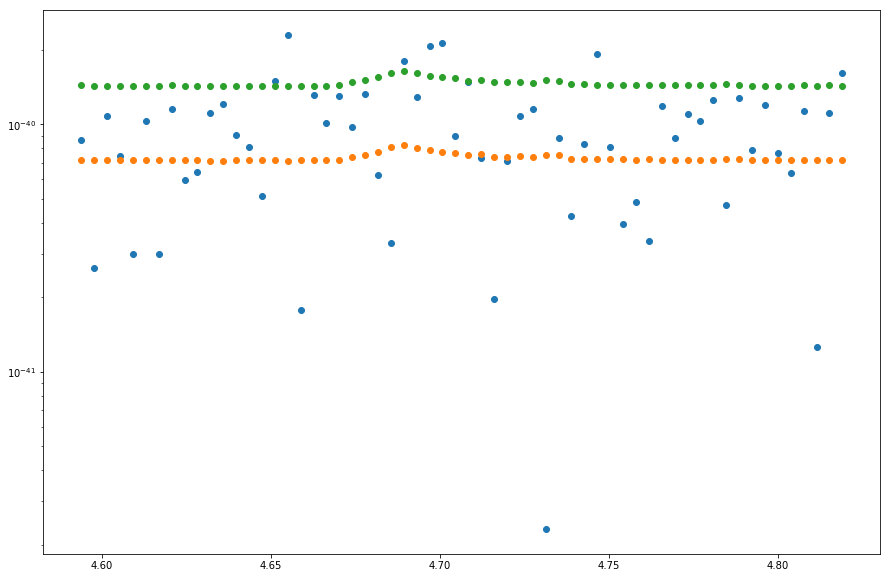

In [146]:
'''plotting total integrated data as well as variance for reference'''

plt.figure(figsize= (15, 10))
plt.plot(freq_array[1000:1060], (magnitude_value[1000:1060]), 'o')
plt.plot(freq_array[1000:1060] , 1
         *standard_dev[1000:1060], 'o')
plt.plot(freq_array[1000:1060] , 2
         *standard_dev[1000:1060], 'o')
plt.yscale('log')
#plt.ylim(1*10e-42, 1*10e-40       )
plt.show()

In [29]:
difference_data_and_variance = []
for data, stdev in zip(magnitude_value,standard_dev):
    difference_data_and_variance.append(data-stdev)
print(variances_values[300:350])

[6.20055e-81, 6.34595e-81, 5.55663e-81, 5.83458e-81, 6.24091e-81, 6.7479e-81, 6.47717e-81, 6.1696e-81, 6.47575e-81, 8.10717e-81, 1.89361e-80, 1.24231e-80, 2.08646e-80, 1.21505e-80, 7.16078e-81, 6.58456e-81, 5.94979e-81, 5.98779e-81, 5.90297e-81, 5.58913e-81, 5.78599e-81, 6.10319e-81, 5.78471e-81, 5.64438e-81, 5.77921e-81, 5.80741e-81, 5.55219e-81, 5.44204e-81, 5.4482e-81, 5.47334e-81, 5.49384e-81, 5.56672e-81, 5.66663e-81, 5.62055e-81, 5.59451e-81, 5.43902e-81, 5.56969e-81, 5.7242e-81, 5.58563e-81, 5.61574e-81, 5.46739e-81, 5.40417e-81, 5.37792e-81, 5.46382e-81, 6.59447e-81, 6.10838e-81, 5.70673e-81, 5.57054e-81, 5.47412e-81, 5.48159e-81]


In [48]:
for dif, stdev in zip(difference_data_and_variance, standard_dev):
    if dif > .98*stdev and dif < 1*stdev:
        index_value = difference_data_and_variance.index(dif)
        print dif, index_value, freq_array[index_value]
    else:
        pass
#print(difference_data_and_variance)

8.51536759995e-41 143 1.29034
7.43202658613e-41 550 2.87346
7.62283209821e-41 837 3.97211
7.38279444843e-41 853 4.03315
7.1030461853e-41 949 4.39937
7.27984350896e-41 1144 5.14324
7.15486117626e-41 1232 5.47894
7.23470218074e-41 1538 6.65389


In [57]:
def find_nearest(array, value):
    
    idx = np.abs(array-value).argmin()
    return(array[idx])

In [60]:
print(freq_val.index(find_nearest(freq_array, 5.2)))

1159


In [97]:
frequency_second_harm = []
index_second_harm = []
frequency_third_harm = []
index_third_harm = []
frequency_fourth_harm = []
index_fourth_harm = []
frequency_fifth_harm = []
index_fifth_harm = []
harm = []
lower_limit_stdev = 0    #1 + whatever this value is (you already have values grater than 1 stdev)
upper_limit_stdev = .5  #1 plus whatever this value is

for dif in difference_data_and_variance[:500]:
    if dif > lower_limit_stdev*stdev and dif < upper_limit_stdev*stdev:
        index_value = difference_data_and_variance.index(dif)
        second_harm_freq = 2*freq_array[index_value]
        second_harm_index = freq_val.index(find_nearest(freq_array, second_harm_freq))
        if difference_data_and_variance[second_harm_index] > lower_limit_stdev*stdev and difference_data_and_variance[second_harm_index] < upper_limit_stdev*stdev:
            third_harm_freq = 3*freq_array[index_value]
            third_harm_index = freq_val.index(find_nearest(freq_array, third_harm_freq))
            frequency_second_harm.append(second_harm_freq)
            index_second_harm.append(second_harm_index)
            if difference_data_and_variance[third_harm_index] > lower_limit_stdev*stdev and difference_data_and_variance[third_harm_index] < upper_limit_stdev*stdev:
                fourth_harm_freq = 4*freq_array[index_value]
                fourth_harm_index = freq_val.index(find_nearest(freq_array, fourth_harm_freq))
                frequency_third_harm.append(third_harm_freq)
                index_third_harm.append(third_harm_index)
                if difference_data_and_variance[fourth_harm_index] > lower_limit_stdev*stdev and difference_data_and_variance[fourth_harm_index] < upper_limit_stdev*stdev:
                    fifth_harm_freq = 5*freq_array[index_value]
                    fifth_harm_index = freq_val.index(find_nearest(freq_array, fifth_harm_freq))
                    frequency_fourth_harm.append(fourth_harm_freq)
                    index_fourth_harm.append(fourth_harm_index)
                    if difference_data_and_variance[fifth_harm_index] > lower_limit_stdev*stdev and difference_data_and_variance[fifth_harm_index] < upper_limit_stdev*stdev:
                        sixth_harm_freq = 6*freq_array[index_value]
                        sixth_harm_index = freq_val.index(find_nearest(freq_array, sixth_harm_freq))
                        frequency_fifth_harm.append(fifth_harm_freq)
                        index_fifth_harm.append(fifth_harm_index)
                        harm.append(freq_array[index_value])
                    else:
                        pass
                else:    
                    pass
            else:
                pass
        else:
            pass
    else:
        pass

In [98]:
print(harm)

[2.4004300000000001, 2.5759099999999999, 2.6102500000000002, 2.61788, 2.64839]


In [99]:
print frequency_fifth_harm

[12.00215, 12.87955, 13.051250000000001, 13.089399999999999, 13.241949999999999]


In [100]:
print frequency_third_harm

[3.9168000000000003, 4.6034699999999997, 4.7751299999999999, 5.3129999999999997, 6.8007599999999995, 7.2012900000000002, 7.7277299999999993, 7.8307500000000001, 7.8536400000000004, 7.9451700000000001]


In [ ]:
def harmonic_loop(lower_limit_stdev, upper_limit_stdev, harmonic_number):
    if dif > lower_limit_stdev*stdev and dif < upper_limit_stdev*stdev:
        index_value = difference_data_and_variance.index(dif)
        second_harm_freq = 2*freq_array[index_value]
        second_harm_index = freq_val.index(find_nearest(freq_array, second_harm_freq))
        
    if difference_data_and_variance[second_harm_index] > lower_limit_stdev*stdev and difference_data_and_variance[second_harm_index] < upper_limit_stdev*stdev:
            third_harm_freq = 3*freq_array[index_value]
            third_harm_index = freq_val.index(find_nearest(freq_array, third_harm_freq))
            frequency_second_harm.append(second_harm_freq)
            index_second_harm.append(second_harm_index)
            
    if difference_data_and_variance[harm_index] > lower_limit_stdev*stdev and difference_data_and_variance[harm_index] < upper_limit_stdev*stdev:
            harmonic_freq = harmonic_number*freq_array[index_value]
            harm_index = freq_val.index(find_nearest(freq_array, harm_freq))
            #frequency_second_harm.append(second_harm_freq)
            #index_second_harm.append(second_harm_index)

In [153]:
def harmonic_loop(harm_freq, harm_index, lower_limit_stdev, upper_limit_stdev, harmonic_number):
    if difference_data_and_variance[harm_index] > lower_limit_stdev*stdev and difference_data_and_variance[harm_index] < upper_limit_stdev*stdev:
            harm_freq = harmonic_number*freq_array[index_value]
            harm_index = freq_val.index(find_nearest(freq_array, harm_freq))
    print(harm_freq, harm_index)

In [155]:

for dif in difference_data_and_variance[:500]:
    if dif > lower_limit_stdev*stdev and dif < upper_limit_stdev*stdev:
        index_value = difference_data_and_variance.index(dif)
        harm_freq = 2*freq_array[index_value]
        harm_index = freq_val.index(find_nearest(freq_array, harm_freq))
        #return(harm_freq, harm_index)
        for harmonic_number in range(2, 9):
            harmonic_loop(harm_freq, harm_index, lower_limit_stdev, upper_limit_stdev, harmonic_number)
            

(1.35233, 159)
(1.35233, 159)
(1.35233, 159)
(1.35233, 159)
(1.35233, 159)
(1.35233, 159)
(1.35233, 159)
(1.3675900000000001, 163)
(1.3675900000000001, 163)
(1.3675900000000001, 163)
(1.3675900000000001, 163)
(1.3675900000000001, 163)
(1.3675900000000001, 163)
(1.3675900000000001, 163)
(1.4133659999999999, 175)
(1.4133659999999999, 175)
(1.4133659999999999, 175)
(1.4133659999999999, 175)
(1.4133659999999999, 175)
(1.4133659999999999, 175)
(1.4133659999999999, 175)
(1.489662, 195)
(1.489662, 195)
(1.489662, 195)
(1.489662, 195)
(1.489662, 195)
(1.489662, 195)
(1.489662, 195)
(1.619364, 229)
(1.619364, 229)
(1.619364, 229)
(1.619364, 229)
(1.619364, 229)
(1.619364, 229)
(1.619364, 229)
(1.634622, 233)
(2.4519329999999999, 439)
(3.269244, 654)
(4.0865549999999997, 867)
(4.9038659999999998, 1081)
(5.721177, 1294)
(6.5384880000000001, 1508)
(1.6651400000000001, 241)
(1.6651400000000001, 241)
(1.6651400000000001, 241)
(1.6651400000000001, 241)
(1.6651400000000001, 241)
(1.6651400000000001, 2

In [105]:
print(range(2, 6))

[2, 3, 4, 5]


In [152]:
print(harm_index)

1192
